In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [2]:
fuji_data = pd.read_csv("fuji_full_fp_sample.csv")
fuji_data = fuji_data.sample(frac=1).reset_index(drop=True)
fuji_data = fuji_data[:200]
fuji_data

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,circ_radius,pos_angle,tmass,flag,z_2,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy
0,149.139467,1.849216,39627829507263476,3274,27247,sv3,bright,39627829507263476,0.032784,0.000005,...,8.498067,-80.950775,2MASXJ09563344+0150575,0,0.0328,14.108,0.621,0.754,0.167,0.314
1,216.202360,-2.215527,39627733994574118,3355,25909,sv3,bright,39627733994574118,0.030447,0.000007,...,7.225221,0.580696,2MASXJ14244855-0212557,1,0.0304,14.150,0.692,1.969,0.055,0.130
2,149.090509,2.640128,39627853666453292,3426,27344,sv3,bright,39627853666453292,0.129991,0.000029,...,1.146794,53.315500,2MASSJ09562170+0238246,1,0.1300,17.268,0.734,2.086,-9.999,0.038
3,217.451026,0.282881,39627794413523342,233,25958,sv1,other,39627794413523342,0.055803,0.000007,...,4.674557,89.559044,2MASXJ14294824+0016584,1,0.0557,15.680,0.654,1.142,0.352,0.198
4,176.428806,54.541172,39633314839005491,2630,5980,sv2,bright,39633314839005491,0.056851,0.000010,...,2.837192,-89.485700,2MASXJ11454288+5432278,1,0.0569,15.071,0.683,0.554,0.311,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,252.743595,33.586897,39632951838770412,3532,9340,sv3,bright,39632951838770412,0.116412,0.000021,...,0.570697,-37.415100,2MASSJ16505846+3335129,1,0.1164,17.787,0.784,2.044,0.283,0.063
196,178.918058,0.515494,39627799807397110,3242,26967,sv3,bright,39627799807397110,0.060619,0.000004,...,1.899962,-29.115458,2MASSJ11554033+0030556,0,0.0606,17.263,0.557,3.427,0.221,0.045
197,218.694525,-0.176642,39627782354899696,3402,25957,sv3,bright,39627782354899696,0.123331,0.000029,...,3.007659,32.683887,2MASXJ14344666-0010357,0,0.1233,16.815,0.639,3.051,0.099,0.239
198,177.157153,54.718685,39633318358025777,2653,5974,sv2,bright,39633318358025777,0.059927,0.000016,...,1.062453,-82.032166,2MASSJ11483771+5443073,1,0.0599,17.213,0.849,1.844,-9.999,0.090


In [3]:
targetid = fuji_data["targetid_1"]
#targetid[817]

In [4]:
px_list=[];data_list=[]
for i in range(len(targetid)):
    #print ("./images/"+str(targetid[i])+".jpeg")
    im = Image.open("./images/"+str(targetid[i])+".jpeg")
    px = im.load
    px_list.append(px)
    data = np.asarray(im)
    data_list.append(data[:,:,2])

In [5]:
px_list = np.array(px_list)
print (np.shape(px_list))
print (px_list[1])
print (px_list[2])
print (np.shape(data_list))
data_list = np.asarray(data_list)
pixel_values = data_list[:len(targetid)].reshape(len(targetid),65536)
print (np.shape(pixel_values))

(200,)
<bound method ImageFile.load of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7FD65FCE6BE0>>
<bound method ImageFile.load of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7FD65FCE6C40>>
(200, 256, 256)
(200, 65536)


In [6]:
single_image = pixel_values[70, :].reshape(256, 256)

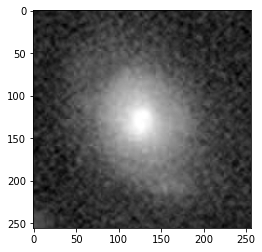

In [7]:
plt.imshow(single_image, cmap='gray')

In [8]:
tsne = manifold.TSNE(n_components=3, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:len(targetid),:])

In [9]:
#print (transformed_data)

In [10]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, fuji_data["flag"])),columns=["x","y","z","targets"])
#tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)
#tsne_df = pd.DataFrame(transformed_data,columns=["x","y"])
np.set_printoptions(threshold=np.inf)
#print (tsne_df)
x = tsne_df["x"]
y = tsne_df["y"]
#print (max(x))
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(tsne_df)
#print (x[40:50])
#for i in range(len(targetid)):
#     if tsne_df["x"][i] <= -60.:# and tsne_df["y"][i] >= 60.:
#         print (tsne_df["x"][i],tsne_df["y"][i],tsne_df["targets"][i],i)

/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


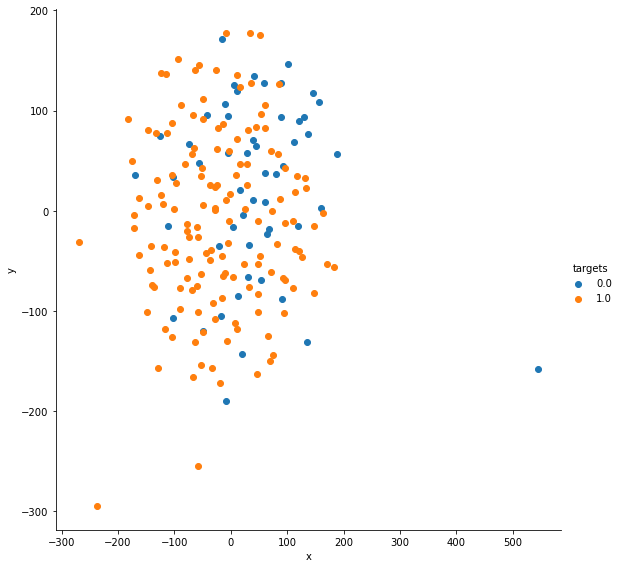

In [11]:
grid = sns.FacetGrid(tsne_df,hue="targets",size=8)
grid.map(plt.scatter,"x","y").add_legend()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


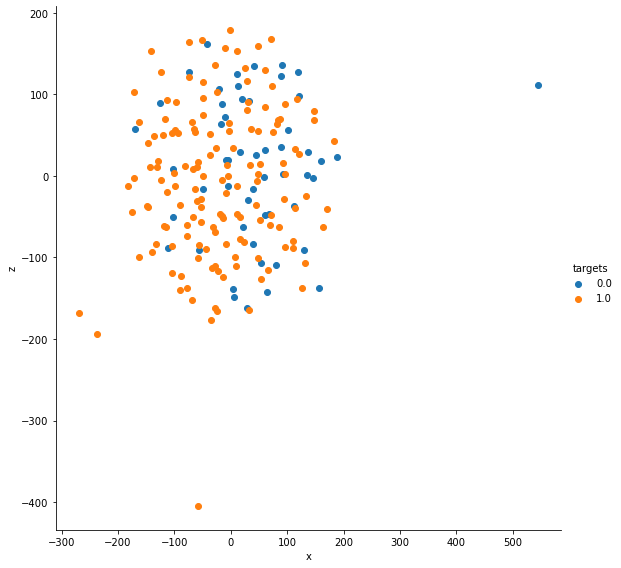

In [12]:
grid = sns.FacetGrid(tsne_df,hue="targets",size=8)
grid.map(plt.scatter,"x","z").add_legend()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


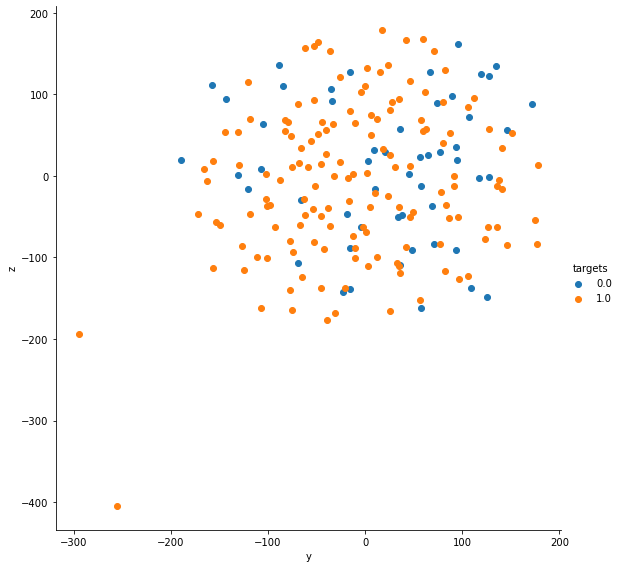

In [13]:
grid = sns.FacetGrid(tsne_df,hue="targets",size=8)
grid.map(plt.scatter,"y","z").add_legend()